 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [12]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv)
whale_returns.set_index(pd.to_datetime(whale_returns["Date"], infer_datetime_format = True), inplace=True)
whale_returns = whale_returns.drop("Date", 1)
whale_returns

# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [10]:
# Count nulls
whale_returns.isnull()
whale_returns.isnull().sum()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [17]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [24]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv)
algo_returns.set_index(pd.to_datetime(algo_returns["Date"], infer_datetime_format=True), inplace = True)
algo_returns=algo_returns.drop("Date",1)
algo_returns
# YOUR CODE HERE

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [25]:
# Count nulls
algo_returns.isnull()
algo_returns.isnull().sum()
# YOUR CODE HERE

Algo 1    0
Algo 2    6
dtype: int64

In [32]:
# Drop nulls
algo_returns=algo_returns.dropna()
algo_returns.isnull().sum()
# YOUR CODE HERE

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [381]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_returns=pd.read_csv(sp500_history_csv)
sp500_returns.set_index(pd.to_datetime(sp500_returns["Date"], infer_datetime_format=True), inplace=True)
sp500_returns=sp500_returns.drop("Date", 1)
sp500_returns

# YOUR CODE HERE

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [382]:
# Check Data Types
sp500_returns.dtypes

# YOUR CODE HERE

Close    object
dtype: object

In [383]:
# Fix Data Types
sp500_returns["Close"]=sp500_returns["Close"].str.replace("$","")
sp500_returns["Close"]= sp500_returns["Close"].astype(float)
sp500_returns
sp500_returns.dtypes

# YOUR CODE HERE

Close    float64
dtype: object

In [390]:
# Calculate Daily Returns
sp500_returns = sp500_returns.sort_index(ascending=True)
sp500_returns
sp500_daily_ret=sp500_returns["Close"].pct_change()
sp500_daily_ret
# YOUR CODE HERE

Date
2012-10-01         NaN
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
                ...   
2019-04-16    0.000509
2019-04-17   -0.002274
2019-04-18    0.001579
2019-04-22    0.001012
2019-04-23    0.008841
Name: Close, Length: 1649, dtype: float64

In [391]:
# Drop nulls
sp500_daily_ret.isnull()
sp500_daily_ret.isnull().sum()
sp500_daily_ret=sp500_daily_ret.dropna()
sp500_daily_ret

# YOUR CODE HERE

Date
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
2012-10-08   -0.003457
                ...   
2019-04-16    0.000509
2019-04-17   -0.002274
2019-04-18    0.001579
2019-04-22    0.001012
2019-04-23    0.008841
Name: Close, Length: 1648, dtype: float64

In [392]:
# Rename Column********
sp500_daily_ret=pd.concat([sp500_daily_ret],axis = 'columns', join="inner")
sp500_daily_ret=sp500_daily_ret.rename({"Close":"S&P500"}, axis = 1)
sp500_daily_ret
# YOUR CODE HERE

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [426]:
# Concatenate all DataFrames into a single DataFrame
Combined_returns = pd.concat([whale_returns, algo_returns, sp500_daily_ret], axis = 'columns', join='inner')

Combined_returns
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

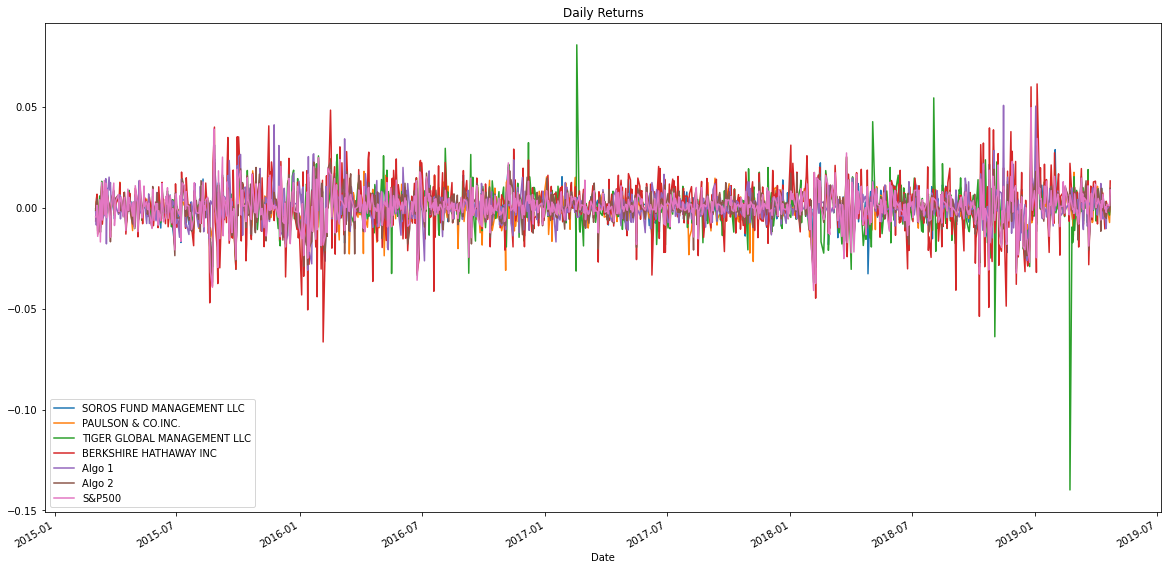

In [427]:
# Plot daily returns
Combined_returns.plot(title="Daily Returns", figsize=(20,10))
# Berkshire Hathaway tends to outperform S&P500

<AxesSubplot:xlabel='Date'>

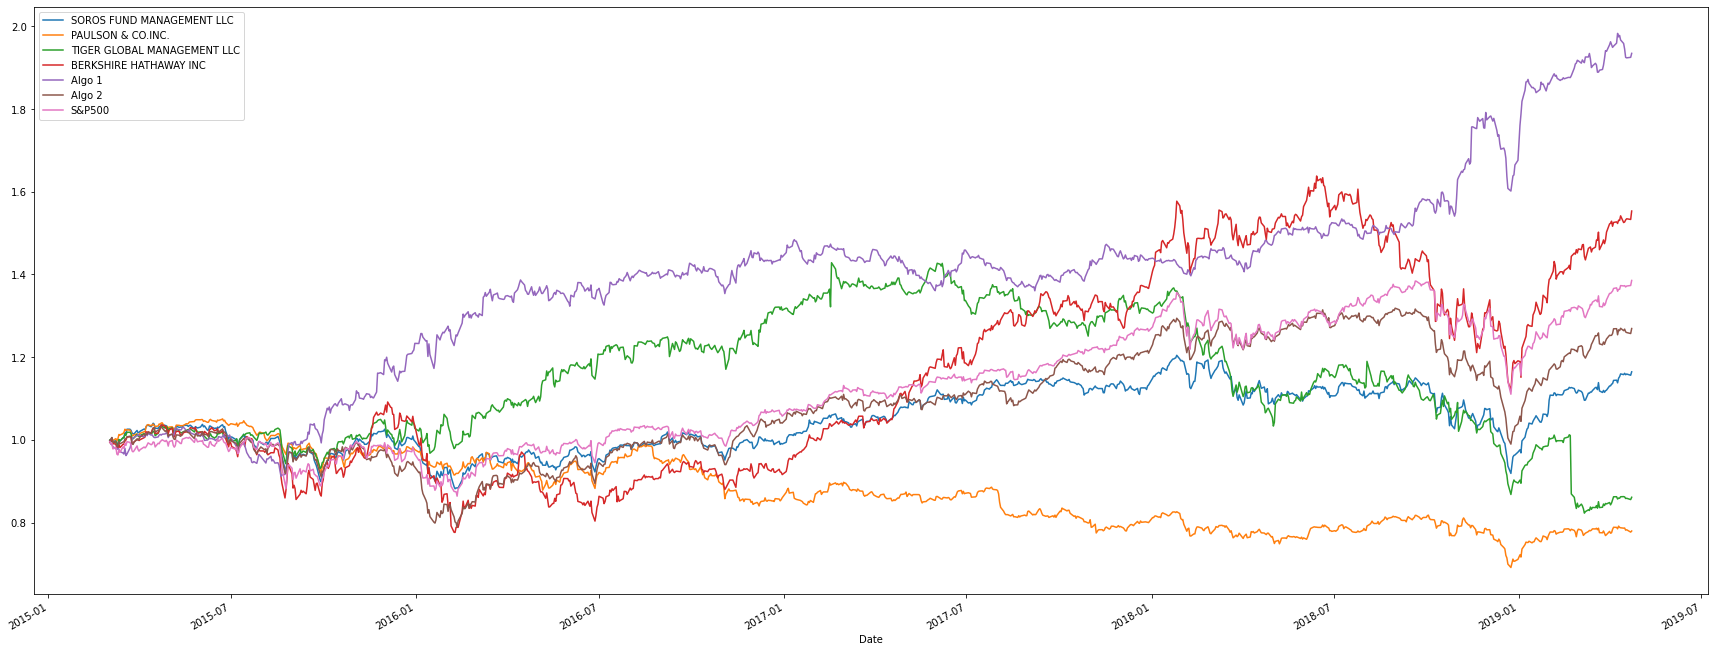

In [428]:
# Plot cumulative returns
Combined_cum_ret = (1 + Combined_returns).cumprod()
Combined_cum_ret.plot(figsize=(30,12))
# YOUR CODE HERE

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:title={'center':'Portfolio Risk'}>

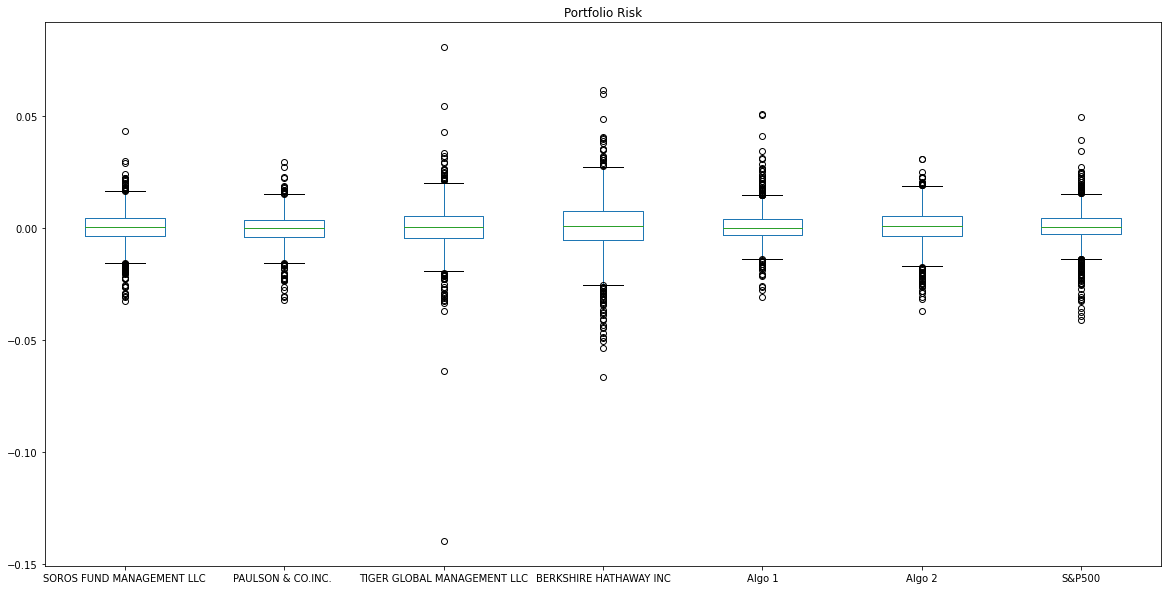

In [429]:
# Box plot to visually show risk  
Combined_returns.plot.box(figsize=(20,10),title="Portfolio Risk")
# YOUR CODE HERE

In [430]:
# Daily Standard Deviations  
Comb_daily_std = Combined_returns.std()
Comb_daily_std
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

In [431]:
# Determine which portfolios are riskier than the S&P 500

Comb_daily_std > 0.008587

# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

In [432]:
# Calculate the annualized standard deviation (252 trading days)
Ann_comb_std = Comb_daily_std * np.sqrt(252)
Ann_comb_std
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

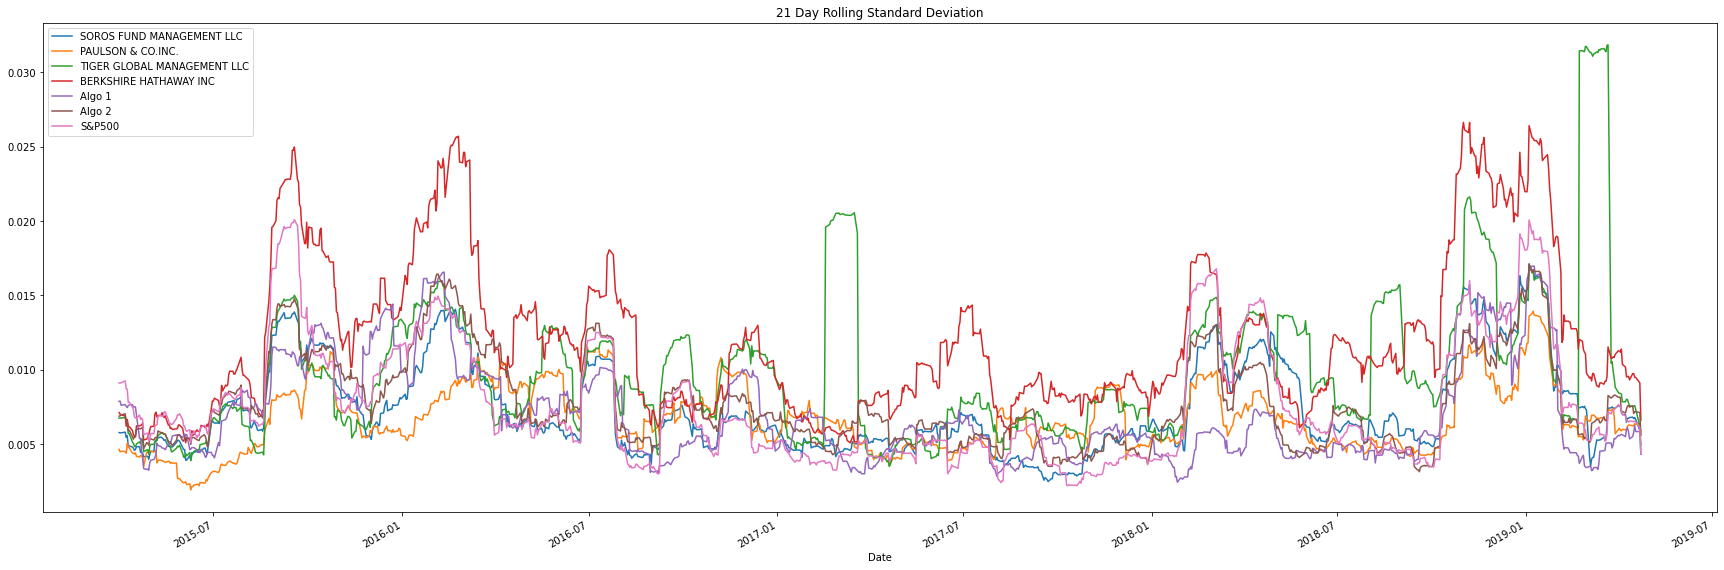

In [433]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
#Combined_returns.rolling(window=21).std().plot(figsize=(30,10), title="21 Day Rolling Standard Deviation")
Combined_rolling=Combined_returns.rolling(window=21).std()
Combined_rolling.plot(figsize=(30,10), title = "21 Day Rolling Standard Deviation")

In [434]:
# Construct a correlation table

Combined_returns.corr()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:title={'center':'Rolling 30-day Beta of Berkshire Hathaway'}, xlabel='Date'>

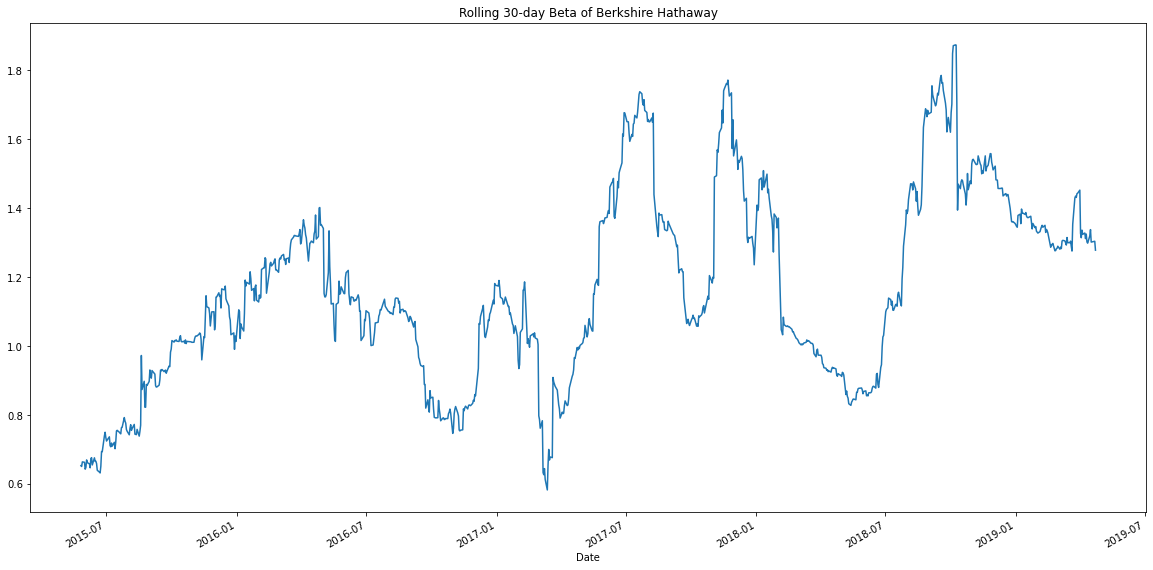

In [523]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)***
# (Your graph may differ, dependent upon which portfolio you are comparing)
rollingcovariance_berkshire = Combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(Combined_returns['S&P500'])
rollingcovariance_berkshire
rollingvariance_sp500 = Combined_returns["S&P500"].rolling(window=60).var()
rollingberkshire_beta = rollingcovariance_berkshire/rollingvariance_sp500
#rollingberkshire_beta
rollingberkshire_beta.plot(figsize=(20,10), title ="Rolling 30-day Beta of Berkshire Hathaway")
# YOUR CODE HERE

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

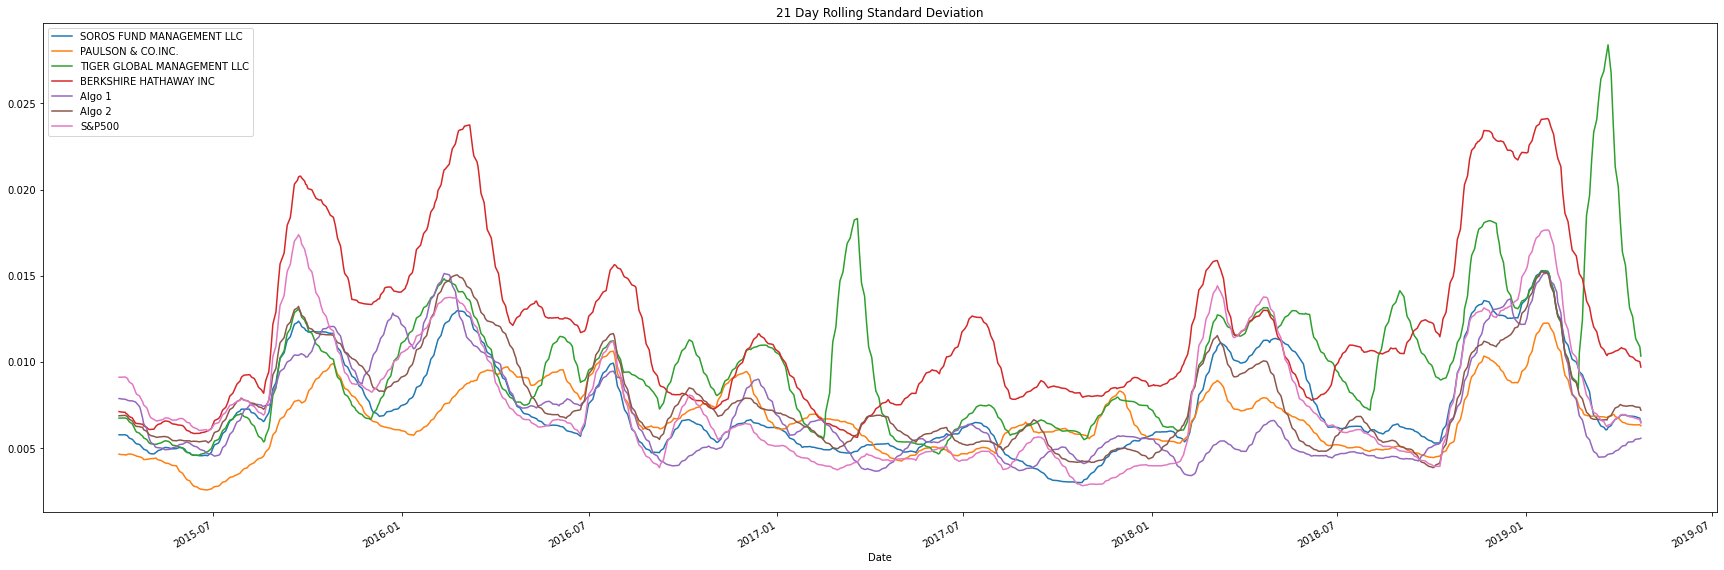

In [436]:
# Calculate a rolling window using the exponentially weighted moving average.
Combined_returns_weight=Combined_rolling.ewm(span=21,adjust=False).mean()

Combined_returns_weight.plot(figsize=(30,10), title = "21 Day Rolling Standard Deviation")
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [439]:
# Calculate annualized Sharpe Ratios***
sharpe_ratios = (Combined_returns.mean())*252/(Combined_returns.std()*np.sqrt(252))
sharpe_ratios
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

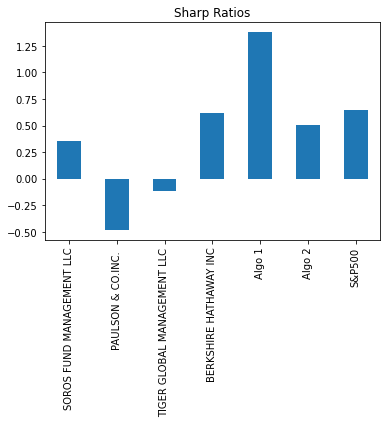

In [440]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharp Ratios")
# YOUR CODE HERE

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [294]:
# Read the first stock
AMDclose_csv = Path("Resources/AMDclose.csv")
AMDclose = pd.read_csv(AMDclose_csv)
AMDclose.set_index(pd.to_datetime(AMDclose["Date"], infer_datetime_format = True), inplace=True)
AMDclose
AMDclose = AMDclose.drop("Date", 1)
AMDclose=AMDclose.rename({"Close":"AMD"}, axis = 1)
AMDclose
# YOUR CODE HERE

,AMD
Date,
2014-01-02 16:00:00,3.95
2014-01-03 16:00:00,4.00
2014-01-06 16:00:00,4.13
2014-01-07 16:00:00,4.18
2014-01-08 16:00:00,4.18
...,...
2019-12-23 16:00:00,45.46
2019-12-24 13:00:00,46.54
2019-12-26 16:00:00,46.63


In [295]:
# Read the second stock
Chipotleclose_csv = Path("Resources/Chipotleclose.csv")
Chipotleclose = pd.read_csv(Chipotleclose_csv)
Chipotleclose.set_index(pd.to_datetime(Chipotleclose["Date"], infer_datetime_format = True), inplace=True)
Chipotleclose = Chipotleclose.drop("Date", 1)
Chipotleclose=Chipotleclose.rename({"Close":"CMG"}, axis = 1)
Chipotleclose
# YOUR CODE HEREAMDclose

,CMG
Date,
2014-01-02 16:00:00,523.43
2014-01-03 16:00:00,531.31
2014-01-06 16:00:00,527.32
2014-01-07 16:00:00,533.06
2014-01-08 16:00:00,535.85
...,...
2019-12-23 16:00:00,828.29
2019-12-24 13:00:00,828.89
2019-12-26 16:00:00,838.60


In [296]:
# Read the third stock
GLDclose_csv = Path("Resources/GLDclose.csv")
GLDclose = pd.read_csv(GLDclose_csv)
GLDclose.set_index(pd.to_datetime(GLDclose["Date"], infer_datetime_format = True), inplace=True)
GLDclose = GLDclose.drop("Date", 1)
GLDclose=GLDclose.rename({"Close":"GLD"}, axis = 1)
GLDclose
# YOUR CODE HERE

,GLD
Date,
2014-01-02 16:00:00,118.00
2014-01-03 16:00:00,119.29
2014-01-06 16:00:00,119.50
2014-01-07 16:00:00,118.82
2014-01-08 16:00:00,118.12
...,...
2019-12-23 16:00:00,139.95
2019-12-24 13:00:00,141.27
2019-12-26 16:00:00,142.38


In [297]:
IBMclose_csv = Path("Resources/IBMclose.csv")
IBMclose = pd.read_csv(IBMclose_csv)
IBMclose.set_index(pd.to_datetime(IBMclose["Date"], infer_datetime_format = True), inplace=True)
IBMclose = IBMclose.drop("Date", 1)
IBMclose=IBMclose.rename({"Close":"IBM"}, axis = 1)
IBMclose

,IBM
Date,
2014-01-02 16:00:00,185.53
2014-01-03 16:00:00,186.64
2014-01-06 16:00:00,186.00
2014-01-07 16:00:00,189.71
2014-01-08 16:00:00,187.97
...,...
2019-12-23 16:00:00,135.55
2019-12-24 13:00:00,134.98
2019-12-26 16:00:00,134.91


In [298]:
TSLAclose_csv = Path("Resources/TSLAclose.csv")
TSLAclose = pd.read_csv(TSLAclose_csv)
TSLAclose.set_index(pd.to_datetime(TSLAclose["Date"], infer_datetime_format = True), inplace=True)
TSLAclose = TSLAclose.drop("Date", 1)
TSLAclose=TSLAclose.rename({"Close":"TSLA"}, axis = 1)
TSLAclose

,TSLA
Date,
2014-01-02 16:00:00,30.02
2014-01-03 16:00:00,29.91
2014-01-06 16:00:00,29.40
2014-01-07 16:00:00,29.87
2014-01-08 16:00:00,30.26
...,...
2019-12-23 16:00:00,83.84
2019-12-24 13:00:00,85.05
2019-12-26 16:00:00,86.19


In [456]:
# Concatenate all stocks into a single DataFrame
LadakPortfolio = pd.concat([AMDclose, Chipotleclose, GLDclose, IBMclose, TSLAclose], axis = 'columns', join='inner')
LadakPortfolio.index = LadakPortfolio.index.strftime('%Y-%m-%d')
LadakPortfolio
# YOUR CODE HERE

,AMD,CMG,GLD,IBM,TSLA
Date,,,,,
2014-01-02,3.95,523.43,118.00,185.53,30.02
2014-01-03,4.00,531.31,119.29,186.64,29.91
2014-01-06,4.13,527.32,119.50,186.00,29.40
2014-01-07,4.18,533.06,118.82,189.71,29.87
2014-01-08,4.18,535.85,118.12,187.97,30.26
...,...,...,...,...,...
2019-12-23,45.46,828.29,139.95,135.55,83.84
2019-12-24,46.54,828.89,141.27,134.98,85.05
2019-12-26,46.63,838.60,142.38,134.91,86.19


In [457]:
# Reset the index
LadakPortfolio=LadakPortfolio.reset_index()
LadakPortfolio
# YOUR CODE HERE

,Date,AMD,CMG,GLD,IBM,TSLA
0,2014-01-02,3.95,523.43,118.00,185.53,30.02
1,2014-01-03,4.00,531.31,119.29,186.64,29.91
2,2014-01-06,4.13,527.32,119.50,186.00,29.40
3,2014-01-07,4.18,533.06,118.82,189.71,29.87
4,2014-01-08,4.18,535.85,118.12,187.97,30.26
...,...,...,...,...,...,...
1503,2019-12-23,45.46,828.29,139.95,135.55,83.84
1504,2019-12-24,46.54,828.89,141.27,134.98,85.05
1505,2019-12-26,46.63,838.60,142.38,134.91,86.19
1506,2019-12-27,46.18,836.79,142.33,135.27,86.08


In [459]:
# Pivot so that each column of prices represents a unique symbol
LadakPortfolio.set_index(pd.to_datetime(LadakPortfolio["Date"], infer_datetime_format = True), inplace=True)
LadakPortfolio
LadakPortfolio = LadakPortfolio.drop("Date", 1)
LadakPortfolio
# YOUR CODE HERE

,AMD,CMG,GLD,IBM,TSLA
Date,,,,,
2014-01-02,3.95,523.43,118.00,185.53,30.02
2014-01-03,4.00,531.31,119.29,186.64,29.91
2014-01-06,4.13,527.32,119.50,186.00,29.40
2014-01-07,4.18,533.06,118.82,189.71,29.87
2014-01-08,4.18,535.85,118.12,187.97,30.26
...,...,...,...,...,...
2019-12-23,45.46,828.29,139.95,135.55,83.84
2019-12-24,46.54,828.89,141.27,134.98,85.05
2019-12-26,46.63,838.60,142.38,134.91,86.19


In [460]:
# Drop Nulls
LadakPortfolio.isnull()
LadakPortfolio.isnull().sum()
Ladak_Port_Returns = LadakPortfolio.pct_change()
Ladak_Port_Returns
Ladak_Port_Returns.isnull()
Ladak_Port_Returns.isnull().sum()
Ladak_Returns=Ladak_Port_Returns.dropna()
Ladak_Returns

# YOUR CODE HERE

,AMD,CMG,GLD,IBM,TSLA
Date,,,,,
2014-01-03,0.012658,0.015055,0.010932,0.005983,-0.003664
2014-01-06,0.032500,-0.007510,0.001760,-0.003429,-0.017051
2014-01-07,0.012107,0.010885,-0.005690,0.019946,0.015986
2014-01-08,0.000000,0.005234,-0.005891,-0.009172,0.013057
2014-01-09,-0.021531,0.009667,0.002878,-0.003139,-0.024785
...,...,...,...,...,...
2019-12-23,0.029672,-0.007477,0.003082,-0.000295,0.033531
2019-12-24,0.023757,0.000724,0.009432,-0.004205,0.014432
2019-12-26,0.001934,0.011714,0.007857,-0.000519,0.013404


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [461]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
Ladak_Ret_weighted = Ladak_Returns.dot(weights)
Ladak_Ret_weighted.head()
# YOUR CODE HERE

Date
2014-01-03    0.008193
2014-01-06    0.001254
2014-01-07    0.010647
2014-01-08    0.000645
2014-01-09   -0.007382
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [464]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
#print(Combined_returns)
#print(Ladak_Returns)
Grandcombined_returns= pd.concat([Combined_returns, Ladak_Returns], axis='columns', join='inner')
Grandcombined_returns.tail()
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,AMD,CMG,GLD,IBM,TSLA
Date,,,,,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.021954,-0.008129,-0.008964,0.008617,0.026089
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.015754,-0.025861,-0.001909,-0.041546,-0.007682
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.006912,0.017131,0.000748,0.008770,0.007373
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.018064,0.002386,0.000000,-0.010262,-0.038426
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,-0.007452,0.001126,-0.002077,0.011160,0.004377


In [467]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Grandcombined_returns = Grandcombined_returns.dropna()
Grandcombined_returns
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,AMD,CMG,GLD,IBM,TSLA
Date,,,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.021807,-0.003622,-0.001815,0.003427,0.011148
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.028662,-0.006388,-0.003118,-0.009998,0.014533
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.022951,0.009531,-0.000956,0.011040,-0.008891
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.020134,-0.017614,-0.027304,-0.016627,-0.033641
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.003425,0.002520,0.000983,0.014322,-0.015472
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.021954,-0.008129,-0.008964,0.008617,0.026089
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.015754,-0.025861,-0.001909,-0.041546,-0.007682
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.006912,0.017131,0.000748,0.008770,0.007373


In [475]:
Grandvolatility = Grandcombined_returns.std() * np.sqrt(252)
#Grandvolatility.sort_values(inplace=True)
Grandvolatility

SOROS FUND MANAGEMENT LLC      0.125395
PAULSON & CO.INC.              0.111541
TIGER GLOBAL MANAGEMENT LLC    0.173019
BERKSHIRE HATHAWAY INC         0.205175
Algo 1                         0.121024
Algo 2                         0.132485
S&P500                         0.135849
AMD                            0.667760
CMG                            0.350308
GLD                            0.123767
IBM                            0.208218
TSLA                           0.444257
dtype: float64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

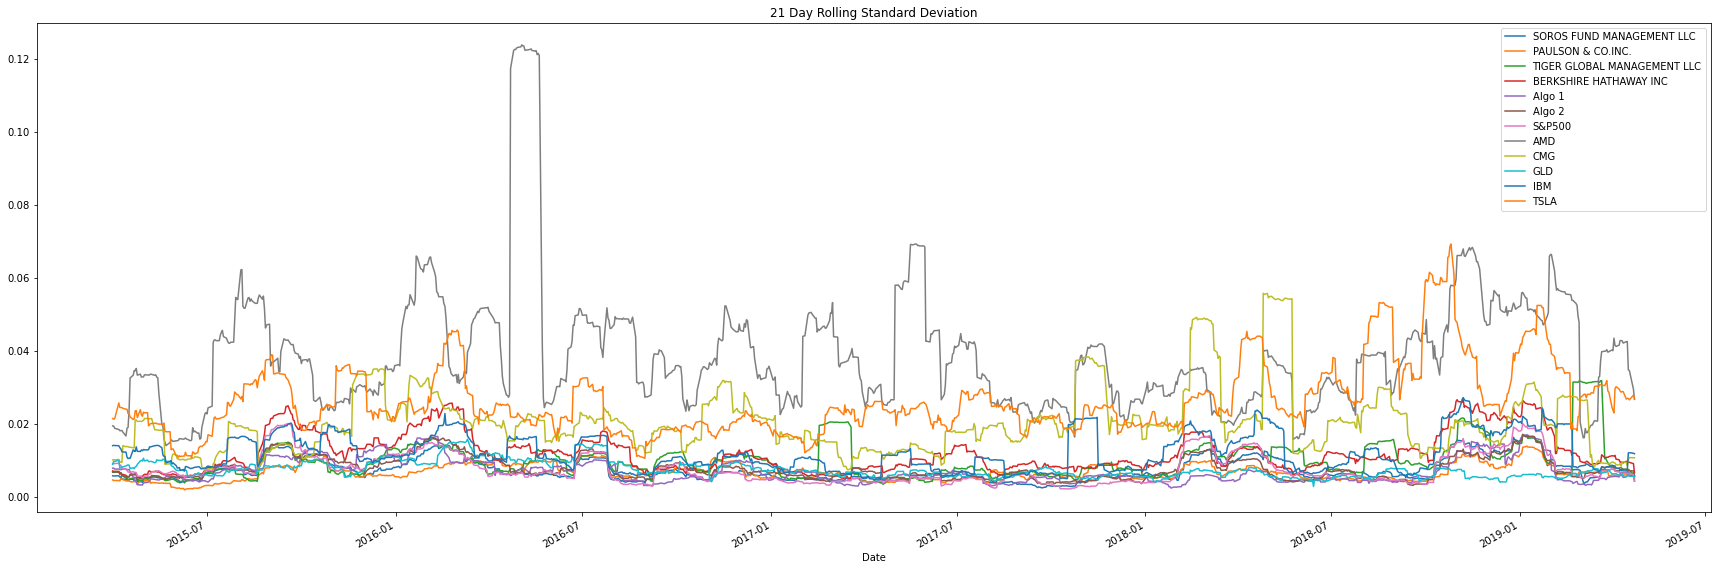

In [476]:
Grandcombined_rolling=Grandcombined_returns.rolling(window=21).std()
Grandcombined_rolling.plot(figsize=(30,10), title = "21 Day Rolling Standard Deviation")

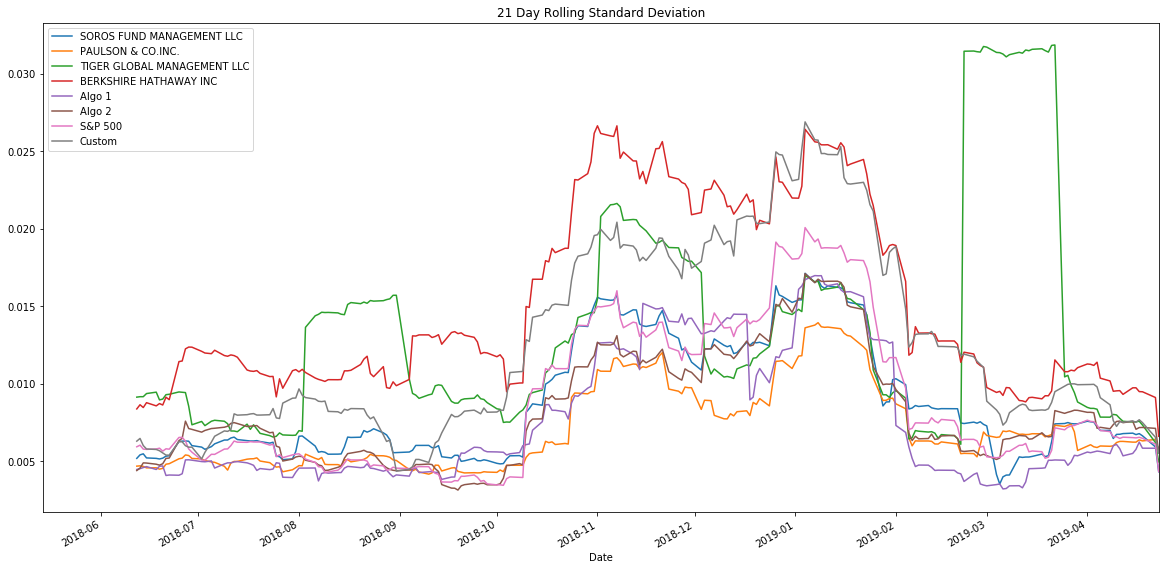

In [39]:
# Rolling
# YOUR CODE HERE

In [483]:

Grandsharpe_ratios = (Grandcombined_returns.mean())*252/(Grandcombined_returns.std()*np.sqrt(252))
Grandsharpe_ratios

SOROS FUND MANAGEMENT LLC      0.357300
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121767
BERKSHIRE HATHAWAY INC         0.621655
Algo 1                         1.380439
Algo 2                         0.495568
S&P500                         0.644930
AMD                            1.106047
CMG                            0.204737
GLD                            0.135330
IBM                           -0.050573
TSLA                           0.379499
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

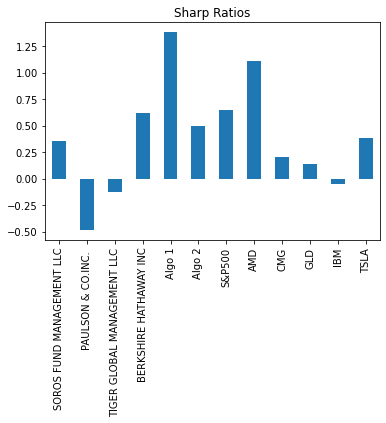

In [484]:
# Visualize the sharpe ratios as a bar plot
Grandsharpe_ratios.plot(kind="bar", title="Sharp Ratios")
# YOUR CODE HERE

In [485]:
# Create a correlation analysis
Grandcombined_returns.corr()
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,AMD,CMG,GLD,IBM,TSLA
SOROS FUND MANAGEMENT LLC,1.000000,0.699917,0.561249,0.754361,0.321206,0.826952,0.837895,0.372693,0.228738,-0.083136,0.498920,0.358617
PAULSON & CO.INC.,0.699917,1.000000,0.434479,0.545623,0.268846,0.678191,0.669742,0.290951,0.208745,-0.050277,0.385208,0.262308
TIGER GLOBAL MANAGEMENT LLC,0.561249,0.434479,1.000000,0.424424,0.164397,0.507430,0.623949,0.220397,0.131397,-0.064026,0.397398,0.245224
BERKSHIRE HATHAWAY INC,0.754361,0.545623,0.424424,1.000000,0.292036,0.688130,0.751388,0.356012,0.176899,-0.112947,0.442668,0.392643
Algo 1,0.321206,0.268846,0.164397,0.292036,1.000000,0.288321,0.279534,0.081927,0.104723,0.012857,0.196336,0.134797
Algo 2,0.826952,0.678191,0.507430,0.688130,0.288321,1.000000,0.858766,0.392585,0.254591,-0.068585,0.534345,0.346600
S&P500,0.837895,0.669742,0.623949,0.751388,0.279534,0.858766,1.000000,0.370675,0.249659,-0.138594,0.628275,0.378770
AMD,0.372693,0.290951,0.220397,0.356012,0.081927,0.392585,0.370675,1.000000,0.118427,-0.074459,0.256846,0.230405
CMG,0.228738,0.208745,0.131397,0.176899,0.104723,0.254591,0.249659,0.118427,1.000000,-0.069740,0.149224,0.129517
GLD,-0.083136,-0.050277,-0.064026,-0.112947,0.012857,-0.068585,-0.138594,-0.074459,-0.069740,1.000000,-0.088513,-0.045568


<AxesSubplot:title={'center':'Rolling 30-day Beta of Ladak Portfolio'}, xlabel='Date'>

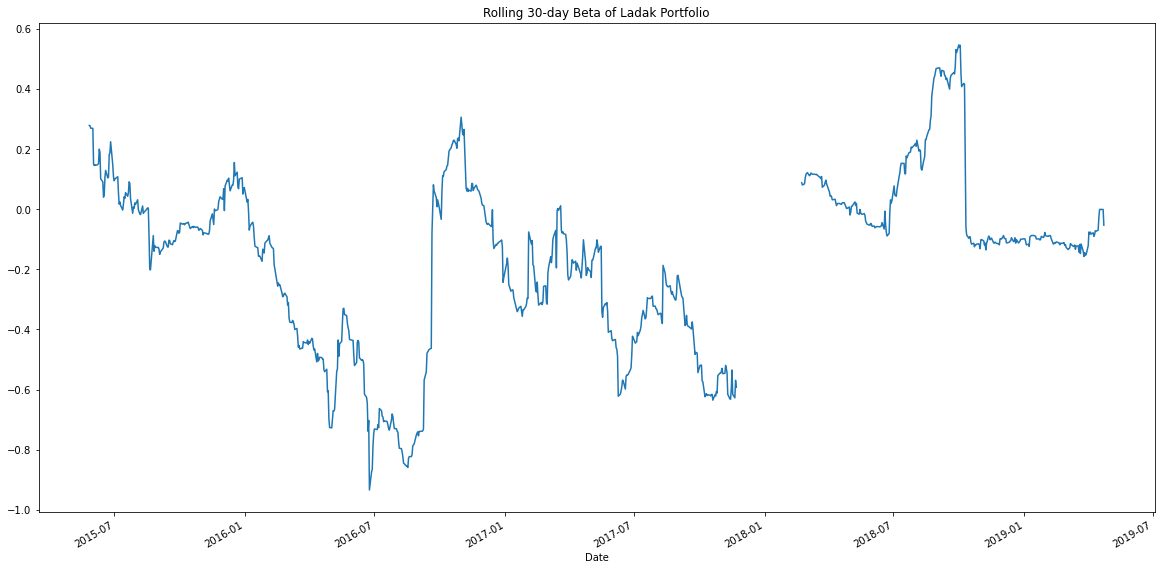

In [522]:
rollingcovariance_ladak = Ladak_Returns["GLD"].rolling(window=60).cov(Combined_returns['S&P500'])
rollingcovariance_ladak
rollingvariance_sp500 = Grandcombined_returns["S&P500"].rolling(window=60).var()
rollingvariance_sp500
rollingladak_beta = rollingcovariance_ladak/rollingvariance_sp500
rollingladak_beta
rollingladak_beta.plot(figsize=(20,10), title ="Rolling 30-day Beta of Ladak Portfolio")

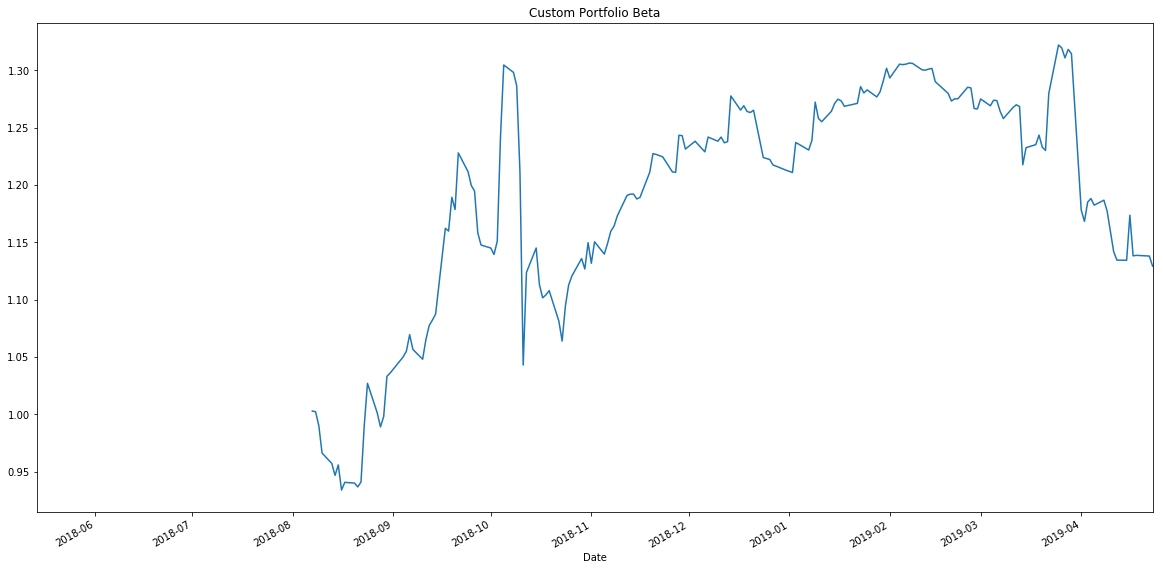

In [43]:
# Beta
rollingcovariance_berkshire = Combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(Combined_returns['S&P500'])
rollingvariance_sp500 = Combined_returns["S&P500"].rolling(window=60).var()
rollingberkshire_beta = rollingcovariance_berkshire/rollingvariance_sp500
rollingberkshire_beta.plot(figsize=(20,10), title ="Rolling 30-day Beeta of Berkshire Hathaway")
# YOUR CODE HERE